
# 6.Bike Hourly rentals data set

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler ,StandardScaler 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
pd.set_option('display.max_rows',1000)
from sklearn.neighbors import KNeighborsRegressor

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score

In [6]:
bike=pd.read_csv(r'bike data.csv')
df_bike = bike.copy()
df_bike.head()


,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,1/1/2011,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16
1,1/1/2011,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40
2,1/1/2011,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32
3,1/1/2011,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13
4,1/1/2011,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1


In [7]:
df_bike.drop(columns=['Date'],inplace=True)

In [8]:
df_bike.head()

,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16
1,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40
2,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32
3,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13
4,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1


In [9]:
# As the total users = casual users + registered users, we can drop casual and registered users

df_bike.drop(['Casual Users','Registered Users'],inplace=True,axis = 1)

In [10]:
df_bike.info()

# As observed there are  no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               17379 non-null  int64  
 1   Hour                 17379 non-null  int64  
 2   Holiday              17379 non-null  int64  
 3   Day of the Week      17379 non-null  int64  
 4   Working Day          17379 non-null  int64  
 5   Weather Type         17379 non-null  int64  
 6   Temperature F        17379 non-null  float64
 7   Temperature Feels F  17379 non-null  float64
 8   Humidity             17379 non-null  int64  
 9   Wind Speed           17379 non-null  int64  
 10  Total Users          17379 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.5 MB


In [11]:
df_bike.describe()
#It looks like there might be outliers in wind speed

,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Total Users
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.485241,11.546752,0.028770,3.003683,0.682721,1.425283,58.777507,59.722009,62.722884,12.736233,189.463088
std,1.115985,6.914405,0.167165,2.005771,0.465431,0.639357,16.620757,20.415345,19.292983,8.196891,181.387599
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.600000,3.200000,0.000000,0.000000,1.000000
25%,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,45.200000,42.800000,48.000000,7.000000,40.000000
50%,2.000000,12.000000,0.000000,3.000000,1.000000,1.000000,59.000000,60.800000,63.000000,13.000000,142.000000
75%,3.000000,18.000000,0.000000,5.000000,1.000000,2.000000,72.800000,77.000000,78.000000,17.000000,281.000000
max,4.000000,23.000000,1.000000,6.000000,1.000000,4.000000,102.200000,122.000000,100.000000,57.000000,977.000000


In [12]:
df_bike.isna().sum()

Season                 0
Hour                   0
Holiday                0
Day of the Week        0
Working Day            0
Weather Type           0
Temperature F          0
Temperature Feels F    0
Humidity               0
Wind Speed             0
Total Users            0
dtype: int64

In [13]:
df_bike.duplicated().any()

True

In [14]:
df_bike.duplicated().sum()

3

In [15]:
df_bike.drop_duplicates(inplace=True)

In [16]:
df_bike.shape

(17376, 11)

In [17]:
df_bike.columns

Index(['Season', 'Hour', 'Holiday', 'Day of the Week', 'Working Day',
       'Weather Type', 'Temperature F', 'Temperature Feels F', 'Humidity',
       'Wind Speed', 'Total Users'],
      dtype='object')

In [18]:
num_cols_bike=df_bike[['Temperature F','Temperature Feels F','Humidity','Wind Speed']]
Q1 = num_cols_bike.quantile(0.25)
Q3 = num_cols_bike.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('lower bounds are:\n',lower_bound)
print('-'*70)
print('upper bounds are:\n',upper_bound)

lower bounds are:
 Temperature F          3.8
Temperature Feels F   -8.5
Humidity               3.0
Wind Speed            -8.0
dtype: float64
----------------------------------------------------------------------
upper bounds are:
 Temperature F          114.2
Temperature Feels F    128.3
Humidity               123.0
Wind Speed              32.0
dtype: float64


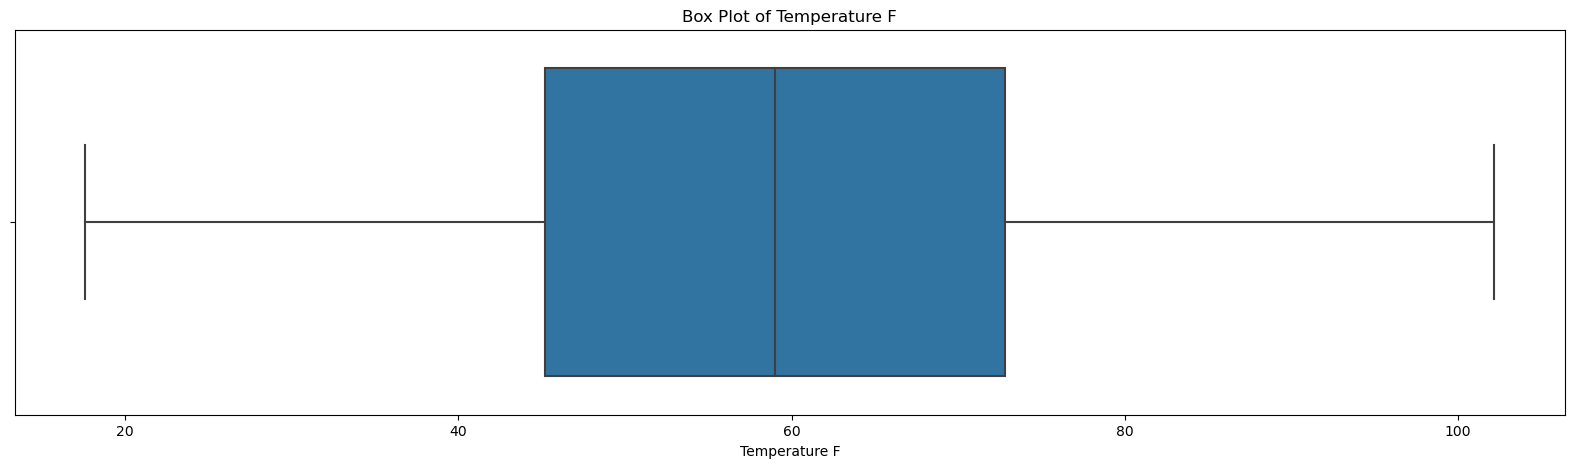

In [19]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df_bike['Temperature F'])
plt.title('Box Plot of Temperature F')
plt.xlabel('Temperature F')
plt.show()

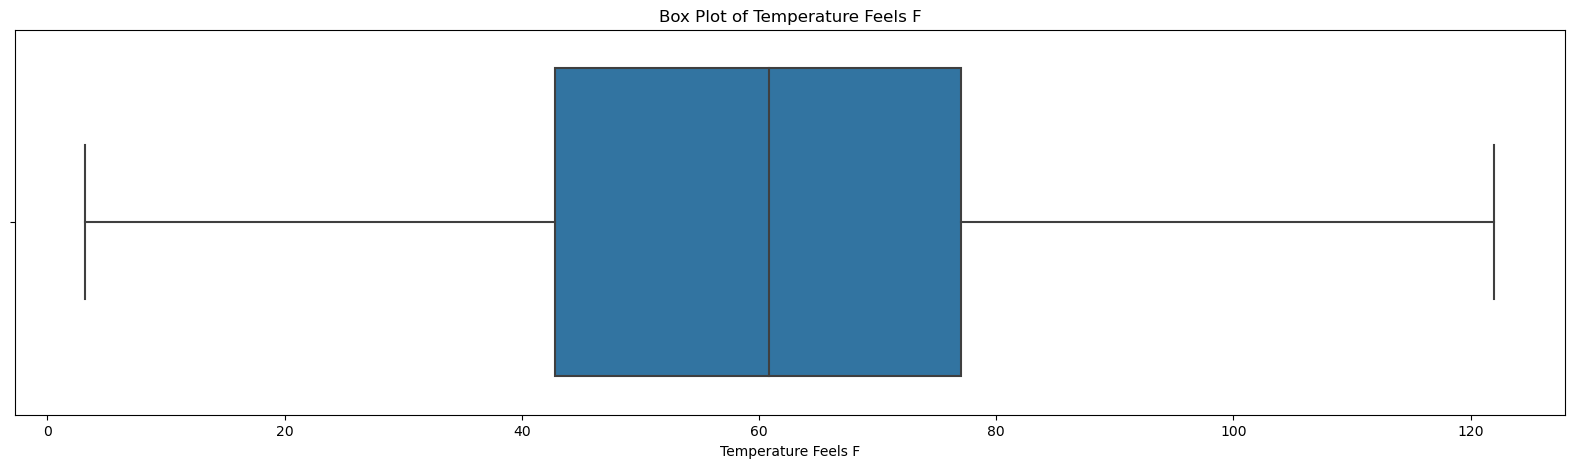

In [20]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df_bike['Temperature Feels F'])
plt.title('Box Plot of Temperature Feels F')
plt.xlabel('Temperature Feels F')
plt.show()

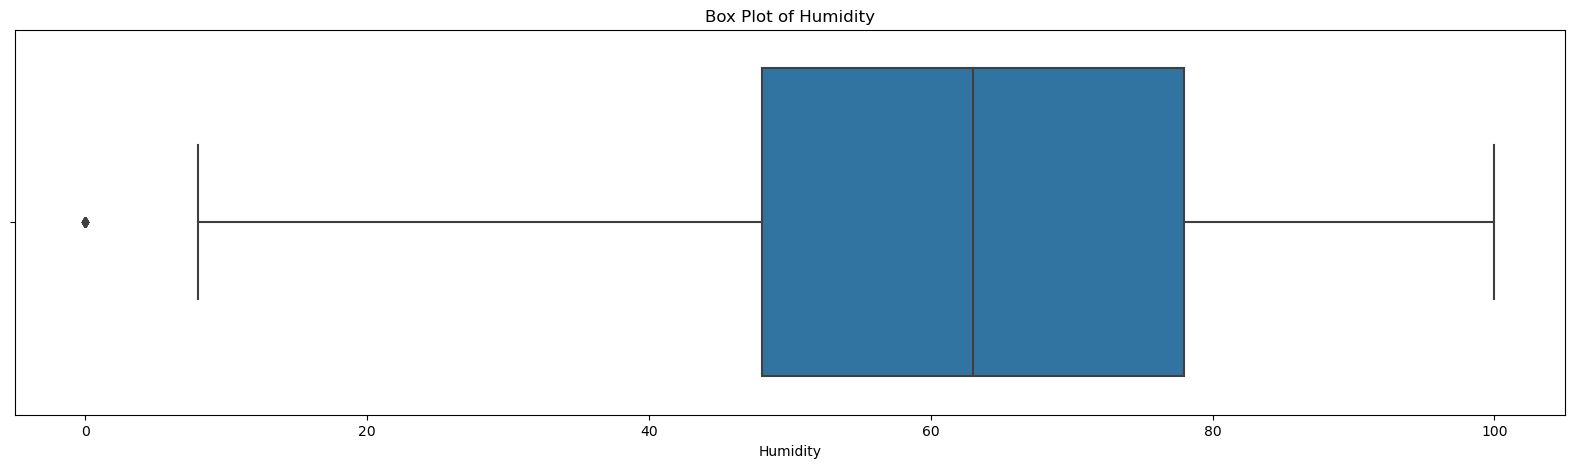

In [21]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df_bike['Humidity'])
plt.title('Box Plot of Humidity')
plt.xlabel('Humidity')
plt.show()

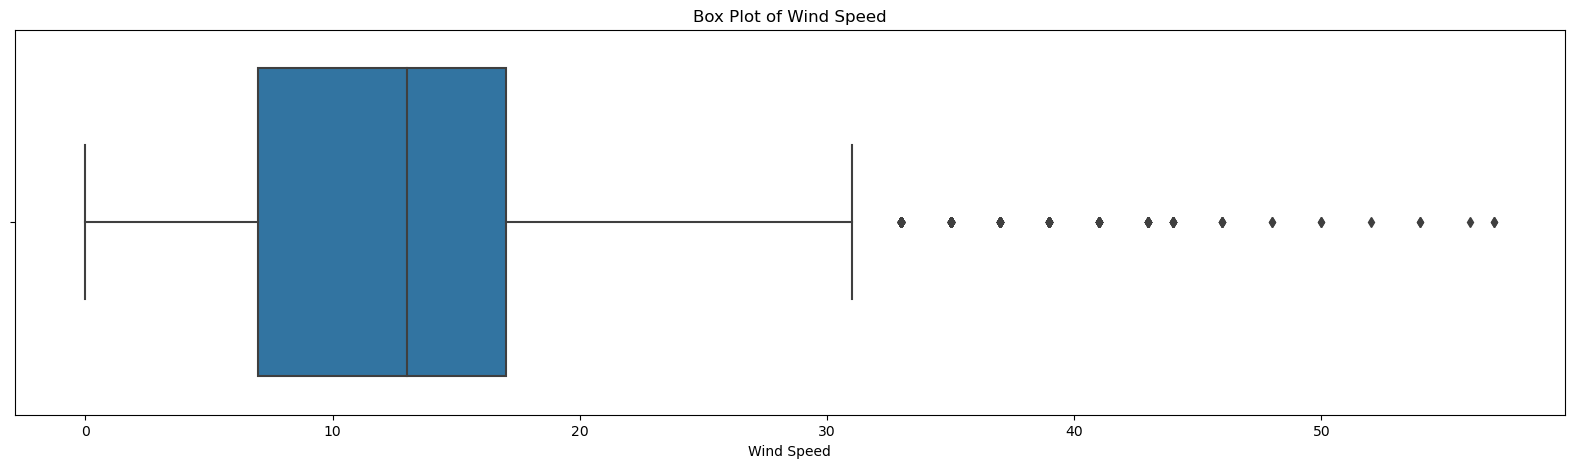

In [22]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df_bike['Wind Speed'])
plt.title('Box Plot of Wind Speed')
plt.xlabel('Wind Speed')
plt.show()

In [23]:
# There are outliers in humidity, wind speed

In [24]:
for x in num_cols_bike.columns:
    print('column is:',x)
    print('min side outliers count is:')
    print(num_cols_bike[num_cols_bike[x] < lower_bound[x]][x].count())
    print('max side outliers count is:')
    print(num_cols_bike[num_cols_bike[x] > upper_bound[x]][x].count())
    print('-'*40)

column is: Temperature F
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------
column is: Temperature Feels F
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------
column is: Humidity
min side outliers count is:
22
max side outliers count is:
0
----------------------------------------
column is: Wind Speed
min side outliers count is:
0
max side outliers count is:
342
----------------------------------------


In [25]:
for x in num_cols_bike.columns:
    df_bike.loc[df_bike[x] > upper_bound[x],x] = upper_bound[x]
    df_bike.loc[df_bike[x] < lower_bound[x],x] = lower_bound[x]    

In [26]:
for x in num_cols_bike.columns:
    print('column is:',x)
    print('min side outliers count is:')
    print(df_bike[df_bike[x] < lower_bound[x]][x].count())
    print('max side outliers count is:')
    print(df_bike[df_bike[x] > upper_bound[x]][x].count())
    print('-'*40)

column is: Temperature F
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------
column is: Temperature Feels F
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------
column is: Humidity
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------
column is: Wind Speed
min side outliers count is:
0
max side outliers count is:
0
----------------------------------------


In [27]:
df_bike.head()

,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Total Users
0,4,0,0,6,0,1,36.6,37.4,81,0,16
1,4,1,0,6,0,1,34.9,35.6,80,0,40
2,4,2,0,6,0,1,34.9,35.6,80,0,32
3,4,3,0,6,0,1,36.6,37.4,75,0,13
4,4,4,0,6,0,1,36.6,37.4,75,0,1


In [28]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17376 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               17376 non-null  int64  
 1   Hour                 17376 non-null  int64  
 2   Holiday              17376 non-null  int64  
 3   Day of the Week      17376 non-null  int64  
 4   Working Day          17376 non-null  int64  
 5   Weather Type         17376 non-null  int64  
 6   Temperature F        17376 non-null  float64
 7   Temperature Feels F  17376 non-null  float64
 8   Humidity             17376 non-null  int64  
 9   Wind Speed           17376 non-null  int64  
 10  Total Users          17376 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.6 MB


C:\Users\naren\AppData\Local\Temp\ipykernel_28892\2052892412.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_bike,x='Day of the Week',palette="Set3",ax=axes[0,0],kde=True).set(title="Histplot of Day of the Week")
C:\Users\naren\AppData\Local\Temp\ipykernel_28892\2052892412.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_bike,x='Temperature F',palette="Set3",ax=axes[0,1],kde=True).set(title="Histplot of Temperature F")
C:\Users\naren\AppData\Local\Temp\ipykernel_28892\2052892412.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_bike,x='Temperature Feels F',palette="Set3",ax=axes[1,0],kde=True).set(title="Histplot of Temperature Feels F")
C:\Users\naren\AppData\Local\Temp\ipykernel_28892\2052892412.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_bike,x='Humidity

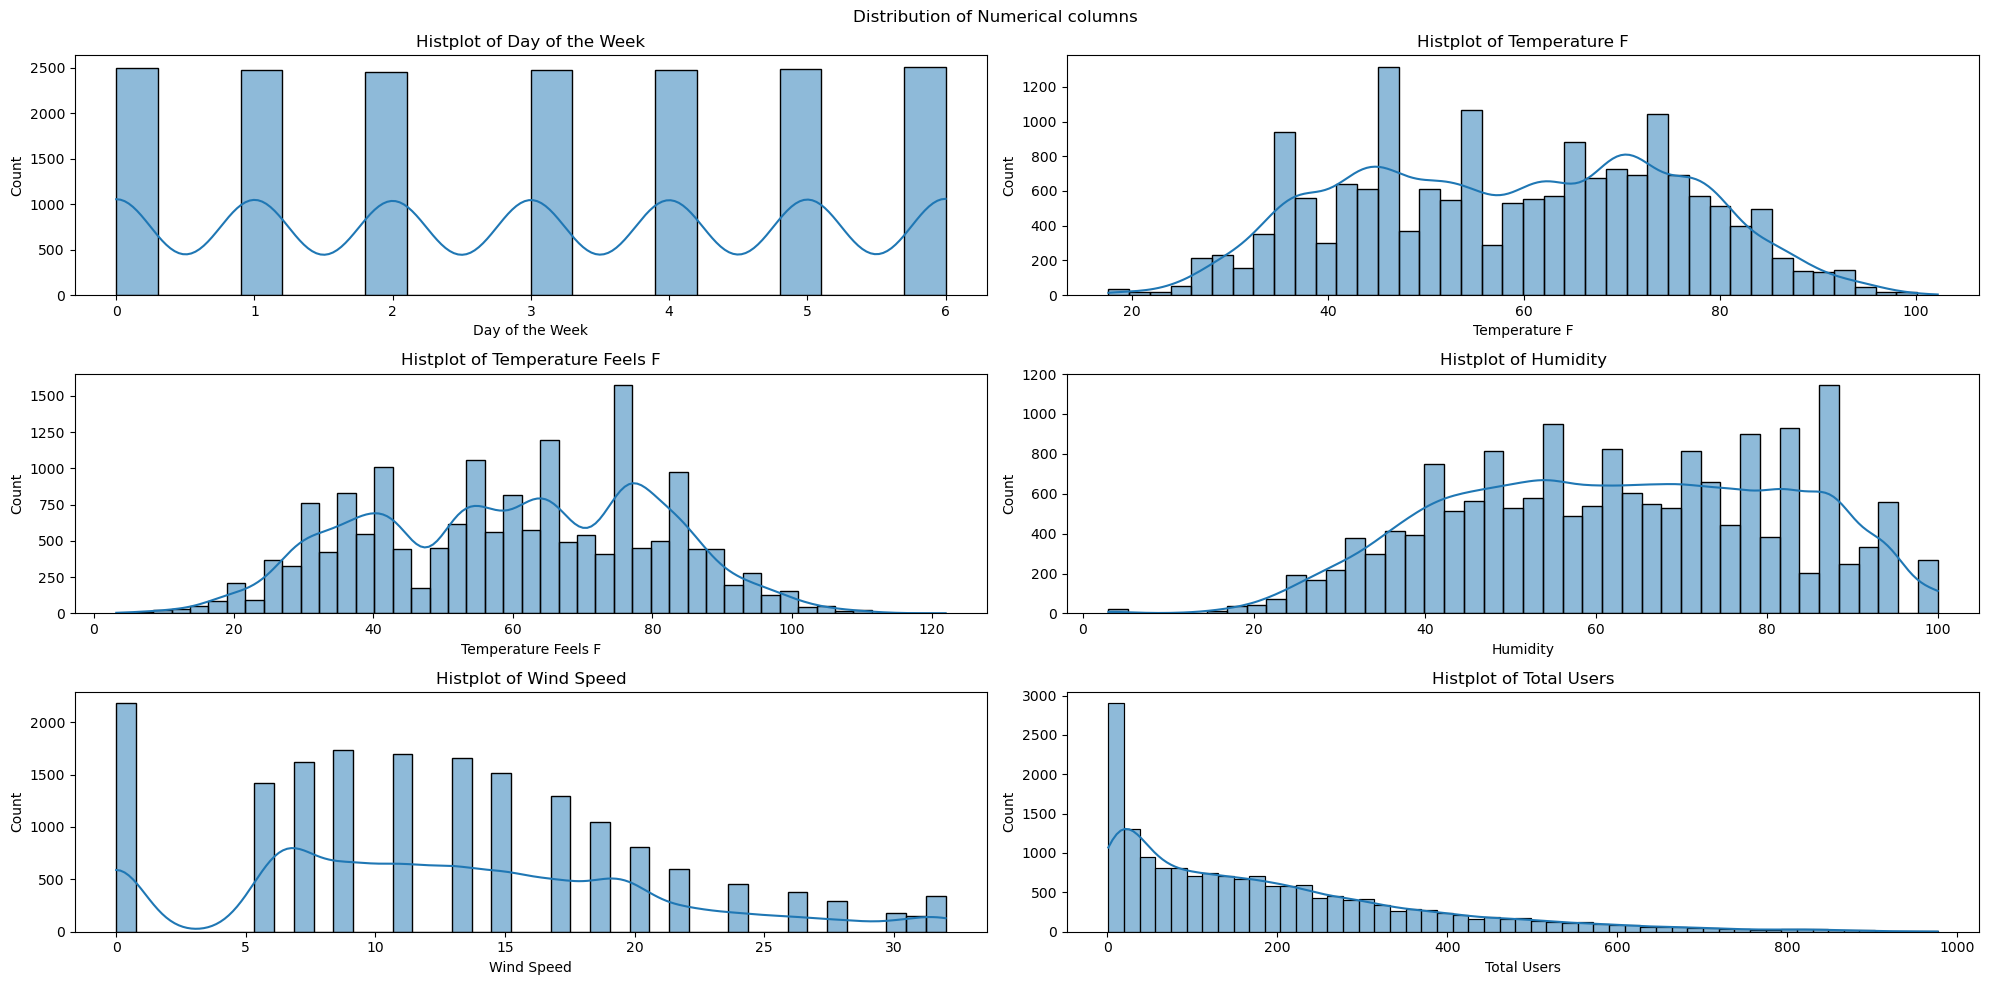

In [29]:
fig,axes=plt.subplots(3,2,figsize=(20,10))
fig.suptitle('Distribution of Numerical columns')
sns.histplot(data=df_bike,x='Day of the Week',palette="Set3",ax=axes[0,0],kde=True).set(title="Histplot of Day of the Week")
sns.histplot(data=df_bike,x='Temperature F',palette="Set3",ax=axes[0,1],kde=True).set(title="Histplot of Temperature F")
sns.histplot(data=df_bike,x='Temperature Feels F',palette="Set3",ax=axes[1,0],kde=True).set(title="Histplot of Temperature Feels F")
sns.histplot(data=df_bike,x='Humidity',palette="Set3",ax=axes[1,1],kde=True).set(title="Histplot of Humidity")
sns.histplot(data=df_bike,x='Wind Speed',palette="Set3",ax=axes[2,0],kde=True).set(title="Histplot of Wind Speed")
sns.histplot(data=df_bike,x='Total Users',palette="Set3",ax=axes[2,1],kde=True).set(title="Histplot of Total Users")
fig.tight_layout()

Text(0.5, 1.0, 'Weather Type')

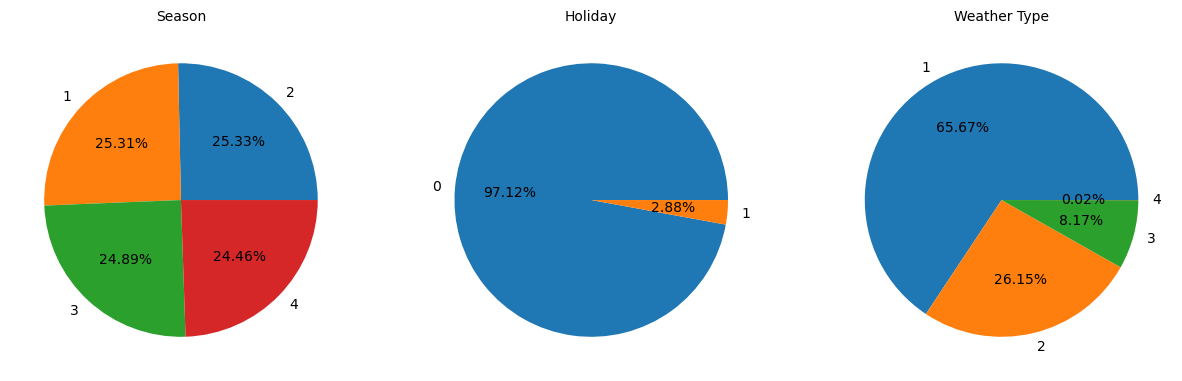

In [30]:
plt.figure(figsize=(15,15))
fig.tight_layout()
plt.subplot(1,3,1)
plt.pie(df_bike['Season'].value_counts(),labels=df_bike['Season'].value_counts().index,autopct="%.2f%%")
plt.title('Season',fontsize=10)
plt.subplot(1,3,2)
plt.pie(df_bike['Holiday'].value_counts(),labels=df_bike['Holiday'].value_counts().index,autopct="%.2f%%")
plt.title('Holiday',fontsize=10)
plt.subplot(1,3,3)
plt.pie(df_bike['Weather Type'].value_counts(),labels=df_bike['Weather Type'].value_counts().index,autopct="%.2f%%")
plt.title('Weather Type',fontsize=10)

<Axes: >

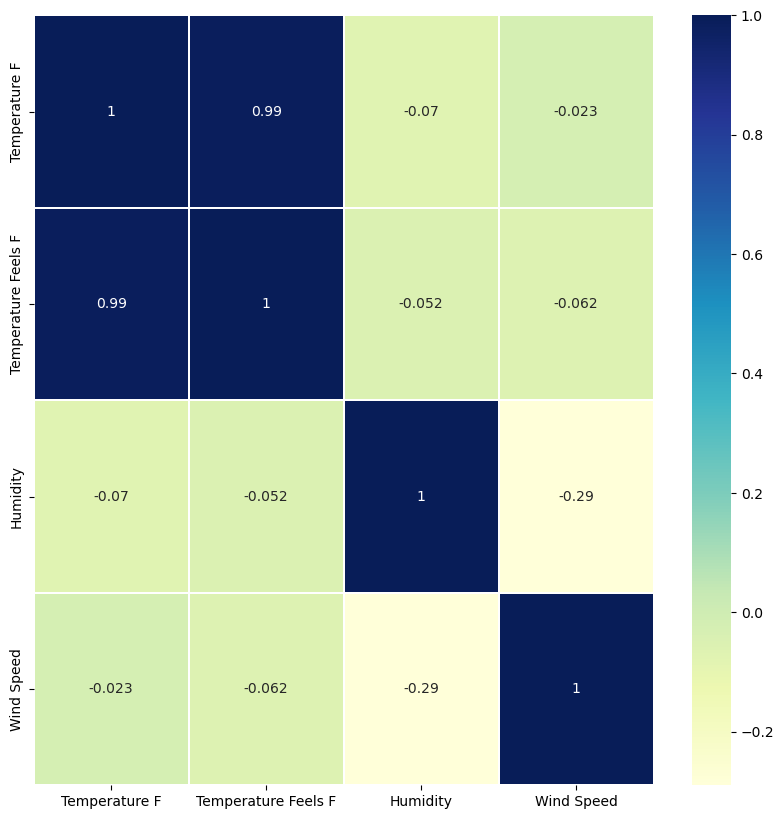

In [31]:
plt.figure(figsize=(10,10))
df_bike_num_corr = sns.heatmap(num_cols_bike.corr(),annot=True,cmap ="YlGnBu",linewidths = 0.1)
df_bike_num_corr

In [32]:
y_main_bike = df_bike['Total Users']
df_bike.drop(columns=['Total Users'],inplace=True,axis=1)

In [33]:
df_bike.head()

,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed
0,4,0,0,6,0,1,36.6,37.4,81,0
1,4,1,0,6,0,1,34.9,35.6,80,0
2,4,2,0,6,0,1,34.9,35.6,80,0
3,4,3,0,6,0,1,36.6,37.4,75,0
4,4,4,0,6,0,1,36.6,37.4,75,0


In [34]:
X_num_bike = df_bike[['Temperature F', 'Temperature Feels F', 'Humidity', 'Wind Speed']]
ss=MinMaxScaler()
scaled_bike = ss.fit_transform(X_num_bike)

In [35]:
scaled_bike = pd.DataFrame(scaled_bike,columns=X_num_bike.columns,index = X_num_bike.index)

In [36]:
X_main_bike = pd.concat([scaled_bike,df_bike[['Season','Hour','Holiday','Day of the Week','Working Day','Weather Type']]],axis=1)
X_main_bike.head()

,Temperature F,Temperature Feels F,Humidity,Wind Speed,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type
0,0.224586,0.287879,0.804124,0.0,4,0,0,6,0,1
1,0.204492,0.272727,0.793814,0.0,4,1,0,6,0,1
2,0.204492,0.272727,0.793814,0.0,4,2,0,6,0,1
3,0.224586,0.287879,0.742268,0.0,4,3,0,6,0,1
4,0.224586,0.287879,0.742268,0.0,4,4,0,6,0,1


In [53]:
X_train, X_test, y_train,y_test = train_test_split(X_main_bike,y_main_bike,test_size=0.3)

In [55]:
print('Shape of X_train is:', X_train.shape)
print('Shape of X_test is:', X_test_bike.shape)
print('Shape of y_train is:', y_train_bike.shape)
print('Shape of y_test is:', y_test_bike.shape)

Shape of X_train is: (12163, 10)


NameError: name 'X_test_bike' is not defined

In [42]:
import warnings
warnings.filterwarnings("ignore")

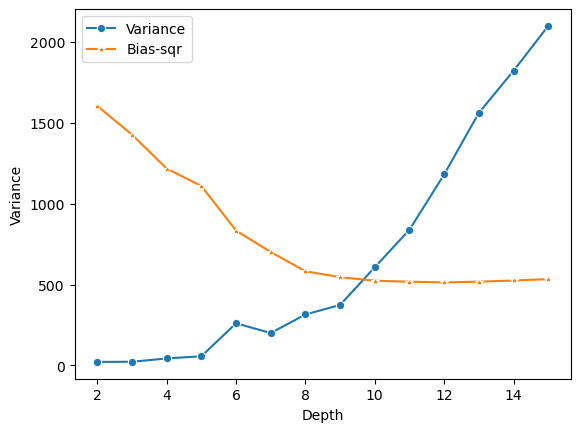

In [43]:
variance_lst=[]
bias_lst=[]
B=13
for j in range(2,16,1):   #running this for various levels of depth. i.e 2 to 16
    df_rf=pd.DataFrame()    #creating an empty Dataframe
    for i in np.arange(1,B,1):      #This Loop is for fitting B models. In this case its 6.
        X_train_RF=X_train.sample(frac=0.9)    #randomly selecting 90 of the rows from original train dataset
        y_train_RF=y_train.loc[X_train_RF.index]
        dtree=DecisionTreeRegressor(max_depth=j)
        model=dtree.fit(X_train_RF,y_train_RF)    #fitting the model with Train data
        pred_rf=model.predict(X_test)             #X_test is used for prediction and it is stored in df_rf
        df_rf[f'yhat_{i}']=pred_rf
#In the below step the expected yhat value is calculated and added as column in the Dataframe
    df_rf['exp_yhat']= df_rf.sum(axis=1)/B
    df_rf.index=X_test.index  
    df_rf['y'] = y_test     
    df_rf['variance']=0
    df_rf['bias']=(df_rf['exp_yhat']-df_rf['y'])**2/B           #calculating Bias-square
    for k in range(0,len(df_rf)):
        df_rf['variance'].iloc[k]=df_rf.iloc[k,0:B].var(ddof=0) #calculating Variance
    variance_lst.append(df_rf['variance'].mean())
    bias_lst.append(df_rf['bias'].mean())
#     print(df_rf['variance'].mean(),df_rf['bias'].mean())
df_var_bias=pd.DataFrame({'Depth':list(np.arange(2,16,1)),'Variance':variance_lst,'Bias':bias_lst})  
sns.lineplot(df_var_bias,x='Depth',y='Variance',marker='o',label='Variance')
sns.lineplot(df_var_bias,x='Depth',y='Bias',marker='*',label='Bias-sqr')
plt.legend()

In [39]:
df_rf

,yhat_1,yhat_2,yhat_3,yhat_4,yhat_5,yhat_6,yhat_7,yhat_8,yhat_9,yhat_10,yhat_11,yhat_12,exp_yhat,y,variance,bias
17150,20.000000,56.000000,123.000000,20.000000,148.000000,130.666667,139.666667,148.000000,138.000000,124.000000,56.000000,148.000000,96.256410,90,2191.283786,3.010975
5063,178.333333,267.666667,211.000000,209.000000,274.000000,332.000000,272.000000,209.000000,247.000000,236.000000,283.500000,332.000000,234.730769,88,2022.972855,1656.147588
3581,5.000000,6.000000,5.000000,8.000000,7.200000,5.000000,13.000000,8.000000,5.000000,5.000000,5.000000,8.000000,6.169231,5,4.852357,0.105162
841,184.132653,185.552632,115.481481,141.691176,185.200000,117.218750,180.950000,117.454545,177.645833,186.159091,184.030928,184.107527,150.740355,66,802.759563,552.379061
5551,31.666667,33.833333,45.250000,36.000000,32.333333,44.000000,32.076923,24.000000,30.833333,36.000000,48.111111,36.333333,33.110618,27,40.475277,2.872281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,12.000000,9.000000,11.000000,11.000000,8.000000,22.000000,11.000000,10.750000,14.666667,5.000000,9.000000,4.000000,9.801282,15,18.182474,2.078974
16315,429.050000,452.285714,316.900000,384.769231,382.529412,456.769231,323.026316,352.571429,388.333333,428.038462,402.000000,389.785714,362.004526,525,1811.761704,2043.655728
10019,150.961538,136.714286,161.975610,141.691176,163.690909,175.097561,189.105263,144.617021,170.462687,131.833333,165.812500,144.526316,144.345246,177,264.629462,82.025611
4568,185.500000,146.857143,193.000000,151.777778,121.000000,170.833333,106.000000,190.000000,149.176471,159.884615,126.750000,156.875000,142.896488,130,651.801499,12.793800


In [41]:
n_estim = [5,10,15,20,25]
max_depth = [3,6,9,10,15]

In [39]:
for x in range(len(n_estim)):
    rf = RandomForestRegressor(n_estimators=n_estim[x],max_depth=max_depth[x])

In [283]:
bias_list = []
variance_list = []

n_estim = [5,10,15,20,25]

for aa in n_estim:
    y_pred_df = pd.DataFrame()
    for x in range(aa):
        train_set_X = X_main_bike.sample(15639)
        index = train_set_X.index
        train_set_y = y_main_bike[index]

        X_train, X_test, y_train,y_test = train_test_split(train_set_X,train_set_y,test_size=0.3)
        X_train = X_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)

        rf = RandomForestRegressor(max_depth = 10)
        model = rf.fit(X_train,y_train)
        y_pred_test = pd.DataFrame(model.predict(X_test))
        y_pred_df = pd.concat([y_pred_df,y_pred_test],axis=1)
        
    y_pred_df.columns = np.arange(1,aa+1)    
    y_pred_df['mean'] = 0
    for z in range(aa):
        y_pred_df['mean'] = y_pred_df['mean'] + y_pred_df.iloc[:,z]
    y_pred_df['mean'] = y_pred_df['mean']/aa
    
        
    y_pred_df['var'] = 0
    for ab in y_pred_df.columns:
        if ab not in ['var','mean']:
            y_pred_df['var'] = y_pred_df['var'] + (y_pred_df['mean']-y_pred_df[ab])**2
                
    y_pred_df['bias'] = 0
    y_pred_df['bias'] = (y_test - y_pred_df['mean'])**2
        
    bias_list.append(y_pred_df['bias'].mean())
    variance_list.append(y_pred_df['var'].mean())   
    

In [56]:
bias_list = []
variance_list = []

n_estim = [5]
depths = [2,4,6,8,10,12,14]
for ac in depths:
    for aa in n_estim:
        y_pred_df = pd.DataFrame()
        for x in range(aa):
            train_set_X = X_main_bike.sample(frac=0.9)
            index = train_set_X.index
            train_set_y = y_main_bike[index]

#             X_train, X_test, y_train,y_test = train_test_split(train_set_X,train_set_y,test_size=0.3)
#             X_train = X_train.reset_index(drop=True)
#             X_test = X_test.reset_index(drop=True)
#             y_train = y_train.reset_index(drop=True)
#             y_test = y_test.reset_index(drop=True)

            rf = RandomForestRegressor(max_depth = ac)
            model = rf.fit(train_set_X,train_set_y)
            y_pred_test = pd.DataFrame(model.predict(X_test))
            y_pred_df = pd.concat([y_pred_df,y_pred_test],axis=1)

        y_pred_df.columns = np.arange(1,aa+1)    

        y_pred_df['mean'] = y_pred_df.mean(axis=1)


        y_pred_df['var'] = 0
        for ab in y_pred_df.columns:
            if ab not in ['var','mean']:
                y_pred_df['var'] = y_pred_df['var'] + (y_pred_df['mean']-y_pred_df[ab])**2

        y_pred_df['bias'] = ((y_test - y_pred_df['mean'])**2)/5

        bias_list.append(y_pred_df['bias'].mean())
        variance_list.append(y_pred_df['var'].mean())   
    

In [58]:
y_test

3725       2
9086     111
12176    498
7236       5
9117     192
        ... 
15176    686
1825     221
2955      64
16471     20
16643     27
Name: Total Users, Length: 5213, dtype: int64

In [59]:
y_pred_df[[1,2,3,4,5]].mean(axis=1)

0         5.278126
1        65.540380
2       449.703810
3         4.926986
4       185.404395
           ...    
5208    613.278916
5209    352.024421
5210     84.719194
5211     36.486313
5212     20.105600
Length: 5213, dtype: float64

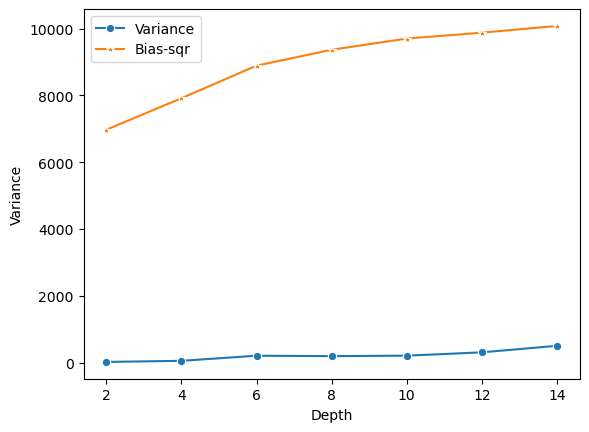

In [57]:
df_var_bias=pd.DataFrame({'Depth':list(np.arange(2,16,2)),'Variance':variance_list,'Bias':bias_list})  
sns.lineplot(data = df_var_bias,x='Depth',y='Variance',marker='o',label='Variance')
sns.lineplot(data = df_var_bias,x='Depth',y='Bias',marker='*',label='Bias-sqr')
plt.legend()

In [231]:
y_pred_df['var'] = 0
for x in y_pred_df.columns:
    if x not in ['var','mean']:
        y_pred_df['var'] = y_pred_df['var'] + (y_pred_df['mean']-y_pred_df[x])**2

In [245]:
y_pred_df['bias'] = 0
y_pred_df['bias'] = (y_test - y_pred_df['mean'])**2

In [247]:
y_pred_df = pd.DataFrame()
    for x in range(5):
        train_set_X = X_main_bike.sample(15639)
        index = train_set.index
        train_set_y = y_main_bike[index]

        X_train, X_test, y_train,y_test = train_test_split(train_set_X,train_set_y,test_size=0.3)
        X_train = X_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)

        rf = RandomForestRegressor(max_depth = 10)
        model = rf.fit(X_train,y_train)
        y_pred_test = pd.DataFrame(model.predict(X_test))
        y_pred_df = pd.concat([y_pred_df,y_pred_test],axis=1)
        
        y_pred_df.columns = np.arange(1,6)       
        
        y_pred_df['mean'] = 0
        for x in range(5):
            y_pred_df['mean'] = y_pred_df['mean'] + y_pred_df.iloc[:,x]
        y_pred_df['mean'] = y_pred_df['mean']/5
        
        y_pred_df['var'] = 0
        for x in y_pred_df.columns:
            if x not in ['var','mean']:
                y_pred_df['var'] = y_pred_df['var'] + (y_pred_df['mean']-y_pred_df[x])**2
                
        y_pred_df['bias'] = 0
        y_pred_df['bias'] = (y_test - y_pred_df['mean'])**2
        
        bias_list.append(y_pred_df['bias'].mean())
        variance_list.append(y_pred_df['var'].mean()) 

In [60]:
algorithms = [ KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]

In [124]:
grid_parameters_dt = {
    'max_depth' : [3,6,9,10,15,20],
    'min_samples_split' : [20,30],
    'min_samples_leaf' : [20,30]
}

grid_parameters_knn = {
    'n_neighbors' : [1,2,3,5,10,15,20]
}

grid_parameters_rf = {
    'n_estimators' : [5,10,15,20,25],
    'max_depth' : [3,6,9,10,15],
    'min_samples_split' : [20,30],
    'min_samples_leaf' : [20,30]
}

param_grid = [grid_parameters_knn,grid_parameters_dt,grid_parameters_rf]

In [125]:
# df_algo = pd.DataFrame(columns=['MSE_train','MSE_test','MAPE_train','MAPE_test','R_square_train','R_square_test'])
df_algo = pd.DataFrame(columns=['MAPE_train','MAPE_test','R_square_train','R_square_test'])

count = 0
for x in algorithms:
        grid_search = GridSearchCV(estimator=x,param_grid=param_grid[count],n_jobs = -1)
        count +=1
        grid_search.fit(X_train_bike,y_train_bike)
        best_model = grid_search.best_estimator_
        print(grid_search.best_params_)
        y_pred_train = best_model.predict(X_train_bike)
        y_pred_test =  best_model.predict(X_test_bike)
#         mse_train = mean_squared_error(y_train_bike,y_pred_train)
#         mse_test = mean_squared_error(y_test_bike,y_pred_test)
        mape_train = mean_absolute_percentage_error(y_train_bike,y_pred_train)
        mape_test = mean_absolute_percentage_error(y_test_bike,y_pred_test)
        r2_train = r2_score(y_train_bike,y_pred_train)
        r2_test = r2_score(y_test_bike,y_pred_test)
        df_algo = df_algo.append({
#             'MSE_train': mse_train,
#             'MSE_test': mse_test,
            'MAPE_train': mape_train,
            'MAPE_test': mape_test,
            'R_square_train': r2_train,
            'R_square_test': r2_test
        }, ignore_index=True)

{'n_neighbors': 15}
{'max_depth': 20, 'min_samples_leaf': 20, 'min_samples_split': 20}
{'max_depth': 15, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 20}
